In [1]:
import numpy as np

In [3]:
x = np.load('First.npy',allow_pickle=True).item()

In [13]:
y1 = np.array(x['numEPlus'])[0]
y2 = np.array(x['numEMinus'])[0]
ysum = [i+j for i,j in zip(y1,y2)]
print(ysum)
y3 = x['depth']

[1, 346, 1232, 3048, 6076, 10613, 17415, 25670, 36625, 50006, 64856, 80860, 97267, 112846, 127900, 139852, 150915, 159845, 165307, 168950, 169425, 167712, 163882, 157474, 150322, 142659, 132453, 123456, 112879, 103235, 93351, 84602, 75798, 68404, 61414, 54739, 50116, 44637, 40524, 37438, 16]


In [7]:
import matplotlib.pylab as plt

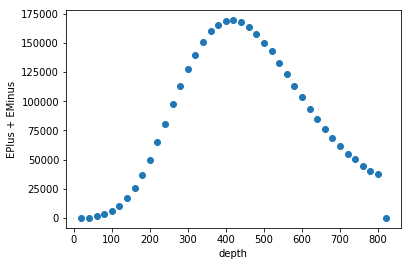

In [17]:
plt.scatter(y3[0],ysum)
plt.xlabel('depth')
plt.ylabel('EPlus + EMinus')
plt.savefig('First_long_profile.png')